## BELL STATES

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram

from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#IBMQ.enable_account(token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

#### SEPARABLE & ENTANGLED STATES

$ \vert \Phi \otimes \Psi \rangle = \sum_{n,m} \alpha_{n} \beta_{m} \vert \varphi_{n} \otimes \psi_{m}\rangle $ 

$ \vert \Theta \rangle = \sum_{n,m} \gamma_{n m} \vert \varphi_{n} \otimes \psi_{m}\rangle $ 

The vector $\vert \Theta \rangle$ can not be written as a tensor product $\vert \Phi \otimes \Psi \rangle $ if it 
will not be possible to factorize $ \gamma_{n m} $ in form $ \alpha_{n} \beta_{m} $

The state vectors that can be written as a tensor product form a subset of $ \mathcal{H}^N \otimes \mathcal{H}^M $
A state vector that cannot be written as  a tensor product is an entangled state


$ \vert \Phi_1 \rangle = \alpha_0 \; \vert \varphi_0 \rangle + \alpha_1 \; \vert \varphi_1 \rangle $ 

$ \vert \Phi_2 \rangle = \beta_0 \; \vert \varphi_0 \rangle + \beta_1 \; \vert \varphi_1 \rangle $ 

$ \vert \Phi_1  \otimes \Phi_2 \rangle
  = \alpha_0 \beta_0  \; \vert \varphi_0 \varphi_0 \rangle  
  + \alpha_0 \beta_1  \; \vert \varphi_0 \varphi_1 \rangle  
  + \alpha_1 \beta_0  \; \vert \varphi_1 \varphi_0 \rangle
  + \alpha_1 \beta_1  \; \vert \varphi_1 \varphi_1 \rangle $

$ \vert \Theta \rangle
  = \gamma_1  \; \vert \varphi_0 \varphi_0 \rangle  
  + \gamma_2  \; \vert \varphi_0 \varphi_1 \rangle  
  + \gamma_3  \; \vert \varphi_1 \varphi_0 \rangle
  + \gamma_4  \; \vert \varphi_1 \varphi_1 \rangle $

$
\begin{cases}
    \alpha_0 \beta_0 = \gamma_1\\
    \alpha_0 \beta_1 = \gamma_2\\
    \alpha_1 \beta_0 = \gamma_3\\
    \alpha_1 \beta_1 = \gamma_4\\
\end{cases}
$

$ \alpha_0 \beta_0 \alpha_1 \beta_1 = \alpha_0 \beta_1 \alpha_1 \beta_0 $

$ \gamma_1 \gamma_4 = \gamma_2 \gamma_3 \implies $  separable states 

### MAXIMALLY ENTANGLED, PURE TWO-QUBIT BELL STATES


$ \vert B_{01} \rangle = \frac{\vert 0 1 \rangle + \vert 1 0 \rangle}{\sqrt{2}} $


$ \vert B_{10} \rangle = \frac{\vert 0 1 \rangle - \vert 1 0 \rangle}{\sqrt{2}} $

$ \vert B_{00} \rangle = \frac{\vert 0 0 \rangle + \vert 1 1 \rangle}{\sqrt{2}} $

$ \vert B_{10} \rangle = \frac{\vert 0 0 \rangle - \vert 1 1 \rangle}{\sqrt{2}} $

#### CNOT GATE

***!!!*** ***Qiskit*** uses an ordering in which the nth qubit is on the left side of the tensor product in quantum register

$ \vert \varphi \rangle = \vert \varphi_{n-1} \rangle  \otimes  \vert \varphi_1 \rangle \; \otimes ... \otimes \;  \vert \varphi_{0} \rangle$

## $ B_{00} $

$ \vert B_{00} \rangle = \frac{\vert 0 0 \rangle + \vert 1 1 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} $
$
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
\end{pmatrix} +
$
$
\begin{pmatrix}
0 \\
0 \\
0 \\
1 \\
\end{pmatrix} =
$
$
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
\frac{1}{\sqrt{2}} \\
\end{pmatrix}
$

$ \vert 0 \rangle  \otimes \vert 0 \rangle = \vert 0 0 \rangle$

$ H \vert 0 \rangle  \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 0\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 0\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle + \vert 1 1\rangle \big) $ 


---- |0> x |0> -----------------------------------------



<IPython.core.display.Latex object>


---- H|0> x |0> ----------------------------------------



<IPython.core.display.Latex object>


----  CNOT(H|0> x |0>) ---------------------------------



<IPython.core.display.Latex object>


---- CIRCUIT CNOT(H|0> x |0>) --------------------------



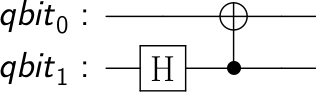

In [2]:
qr = QuantumRegister(2, "qbit")
qc = QuantumCircuit(qr)

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr[1])

state1 = Statevector(qc)

#CNOT Gate
qc.cx(qr[1],qr[0])

state2 = Statevector(qc)

print("\n---- |0> x |0> -----------------------------------------\n")
display(state0.draw('latex'))

print("\n---- H|0> x |0> ----------------------------------------\n")
display(state1.draw('latex'))

print("\n----  CNOT(H|0> x |0>) ---------------------------------\n")
display(state2.draw('latex'))

print("\n---- CIRCUIT CNOT(H|0> x |0>) --------------------------\n")
display(qc.draw("latex"))

## $ B_{01} $

$ \vert B_{01} \rangle = \frac{\vert 0 1 \rangle + \vert 1 0 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} $
$
\begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix} +
$
$
\begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix} =
$
$
\begin{pmatrix}
0 \\
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} \\
0 \\
\end{pmatrix}
$


$ \vert 0 \rangle  \otimes \vert 1 \rangle = \vert 0 1 \rangle$

$ H \vert 0 \rangle  \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 1\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 1\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle + \vert 1 0\rangle \big) $ 


---- |0> x |1> -----------------------------------------



<IPython.core.display.Latex object>


---- H|0> x |1> ----------------------------------------



<IPython.core.display.Latex object>


----  CNOT(H|0> x |1>) ---------------------------------



<IPython.core.display.Latex object>


---- CIRCUIT CNOT(H|0> x |1>) --------------------------



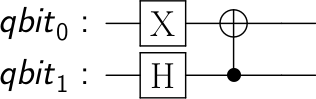

In [3]:
qr = QuantumRegister(2, "qbit")
qc = QuantumCircuit(qr)

#NOT/Pauli X Gate
qc.x(qr[0])

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr[1])

state1 = Statevector(qc)

#CNOT Gate
qc.cx(qr[1],qr[0])

state2 = Statevector(qc)

print("\n---- |0> x |1> -----------------------------------------\n")
display(state0.draw('latex'))

print("\n---- H|0> x |1> ----------------------------------------\n")
display(state1.draw('latex'))

print("\n----  CNOT(H|0> x |1>) ---------------------------------\n")
display(state2.draw('latex'))

print("\n---- CIRCUIT CNOT(H|0> x |1>) --------------------------\n")
display(qc.draw("latex"))

## $ B_{10} $

$ \vert B_{10} \rangle = \frac{\vert 0 0 \rangle - \vert 1 1 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} $
$
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
\end{pmatrix} -
$
$
\begin{pmatrix}
0 \\
0 \\
0 \\
1 \\
\end{pmatrix} =
$
$
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
0 \\
0 \\
- \frac{1}{\sqrt{2}} \\
\end{pmatrix}
$

$ \vert 1 \rangle  \otimes \vert 0 \rangle = \vert 1 0 \rangle$

$ H \vert 1 \rangle  \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 0 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 0\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 0\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 0 \rangle - \vert 1 1\rangle \big) $ 


---- |1> x |0> -----------------------------------------



<IPython.core.display.Latex object>


---- H|1> x |0> ----------------------------------------



<IPython.core.display.Latex object>


----  CNOT(H|1> x |0>) ---------------------------------



<IPython.core.display.Latex object>


---- CIRCUIT CNOT(H|1> x |0>) --------------------------



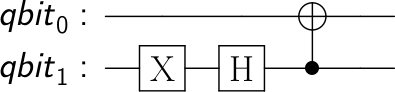

In [4]:
qr = QuantumRegister(2, "qbit")
qc = QuantumCircuit(qr)

#NOT/Pauli X Gate
qc.x(qr[1])

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr[1])

state1 = Statevector(qc)

#CNOT Gate
qc.cx(qr[1],qr[0])

state2 = Statevector(qc)

print("\n---- |1> x |0> -----------------------------------------\n")
display(state0.draw('latex'))

print("\n---- H|1> x |0> ----------------------------------------\n")
display(state1.draw('latex'))

print("\n----  CNOT(H|1> x |0>) ---------------------------------\n")
display(state2.draw('latex'))

print("\n---- CIRCUIT CNOT(H|1> x |0>) --------------------------\n")
display(qc.draw("latex"))

## $ B_{11} $

$ \vert B_{11} \rangle = \frac{\vert 0 1 \rangle - \vert 1 0 \rangle}{\sqrt{2}} =  \frac{1}{\sqrt{2}} $
$
\begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix} -
$
$
\begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix} =
$
$
\begin{pmatrix}
0 \\
\frac{1}{\sqrt{2}} \\
 - \frac{1}{\sqrt{2}} \\
0 \\
\end{pmatrix}
$

$ \vert 1 \rangle  \otimes \vert 1 \rangle = \vert 1 1 \rangle$

$ H \vert 1 \rangle  \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 1 \rangle = \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 1\rangle \big) $

$ CNOT \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 1\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0 1 \rangle - \vert 1 0\rangle \big) $ 


---- |1> x |1> -----------------------------------------



<IPython.core.display.Latex object>


---- H|1> x |1> ----------------------------------------



<IPython.core.display.Latex object>


----  CNOT(H|1> x |1>) ---------------------------------



<IPython.core.display.Latex object>


---- CIRCUIT CNOT(H|1> x |1>) --------------------------



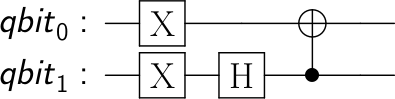

In [5]:
qr = QuantumRegister(2, "qbit")
qc = QuantumCircuit(qr)

#NOT/Pauli X Gate
qc.x(qr[1])
qc.x(qr[0])

state0 = Statevector(qc)

#Hadamard Gate
qc.h(qr[1])

state1 = Statevector(qc)

#CNOT Gate
qc.cx(qr[1],qr[0])

state2 = Statevector(qc)

print("\n---- |1> x |1> -----------------------------------------\n")
display(state0.draw('latex'))

print("\n---- H|1> x |1> ----------------------------------------\n")
display(state1.draw('latex'))

print("\n----  CNOT(H|1> x |1>) ---------------------------------\n")
display(state2.draw('latex'))

print("\n---- CIRCUIT CNOT(H|1> x |1>) --------------------------\n")
display(qc.draw("latex"))